姓名：白思萌
学号：3120190975
学院：计算机学院

# Wine Reviews 数据集

## 数据准备

   数据集主页：https://www.kaggle.com/zynicide/wine-reviews

   首先，导入数据分析与处理所需的数据模块。

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

   其次，导入数据。此数据集中包含两个csv文件，分别进行导入。其中wine表示本次数据集的版本1，wine_v2表示版本2。版本2是在版本1的基础上进行清理并添加三个属性后的结果，可作为版本1清理数据的对比。

In [2]:
wine = pd.read_csv("winemag-data_first150k.csv",index_col=0)
wine_v2 = pd.read_csv("winemag-data-130k-v2.csv",index_col=0)
print (wine.shape[0],wine_v2.shape[0])

150930 129971


通过结果可以看出，版本2比版本1的数量减少了20959。

## 数据可视化和摘要

### 数据摘要

   首先，先对数据进行信息统计。

In [3]:
print('%d colunms' % len(wine.columns))
print('%d rows' % len(wine.index))
print()
print(wine.dtypes.value_counts())

10 colunms
150930 rows

object     8
int64      1
float64    1
dtype: int64


   数据的前5行如下所示。

In [4]:
wine.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


   因此，可以分析出该数据集中包含2个数值属性，分别为points和price两个属性。其余8个为标称属性，由于标称属性的数量较多，此处分析以country和province为例。

**标称属性摘要**

   定义统计函数Count_Nominal(column_name)，统计标称属性中不同值的出现次数和频率，展示出现频率最高的前10个值。

In [5]:
def Count_Nominal(column_name):
    column = wine[column_name].value_counts()
    print('Column name:',column_name)
    print("%d different values" % len(column))
    print()
    column_df = column.to_frame()
    column_df['frequency'] = column.apply(lambda x:x / len(wine.index))
    print(column_df.iloc[:10])
    print('......')
    
    plt.bar(np.arange(10),column.iloc[:10])
    plt.title(column_name)
    plt.show()

   统计标称属性country如下。

Column name: country
48 different values

             country  frequency
US             62397   0.413417
Italy          23478   0.155556
France         21098   0.139787
Spain           8268   0.054780
Chile           5816   0.038534
Argentina       5631   0.037309
Portugal        5322   0.035261
Australia       4957   0.032843
New Zealand     3320   0.021997
Austria         3057   0.020254
......


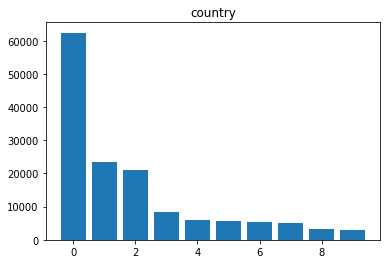

In [6]:
Count_Nominal('country')

   统计标称属性province如下。

Column name: province
455 different values

                  province  frequency
California           44508   0.294892
Washington            9750   0.064599
Tuscany               7281   0.048241
Bordeaux              6111   0.040489
Northern Spain        4892   0.032412
Mendoza Province      4742   0.031419
Oregon                4589   0.030405
Burgundy              4308   0.028543
Piedmont              4093   0.027119
Veneto                3962   0.026251
......


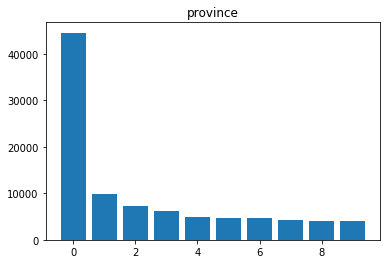

In [7]:
Count_Nominal('province')

**数值属性摘要**

   首先，对数值属性的缺失值个数进行统计。

In [8]:
print('points:',wine['points'].isnull().sum())
print('price:',wine['price'].isnull().sum())

points: 0
price: 13695


   从结果中，可得出，数值属性points缺失值个数为0，price缺失值个数为13695。

   其次，对points和price两个属性进行统计，统计其有效值数量、平均值、标准差、最小值、第一个四分位数、中位数、第二个四分位数以及最大值。结果如下所示。

In [9]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


### 数据可视化

**直方图与Q-Q图——数据分布**

   定义函数Distribution(column_name)，对数值属性值的出现次数进行直方图的绘制，并将其进行标准化为均值为0，方差为1的分布，将标准正态分布作为参考一起绘制Q-Q图，用于观测数据的分布情况。

In [10]:
def Distribution(column_name):
    column = wine[column_name].dropna()
    plt.hist(column,40)
    plt.title(column_name)
    plt.show()
    
    column = (column - column.mean()) / column.std()
    fig = sm.qqplot(column,line = '45')
    plt.title('Q-Q plot')
    plt.show()

   数值属性points的直方图和Q-Q图结果如下。

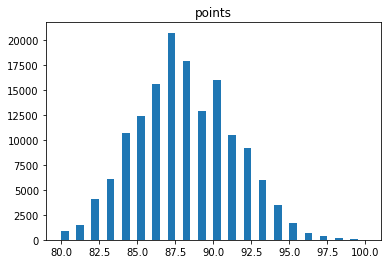

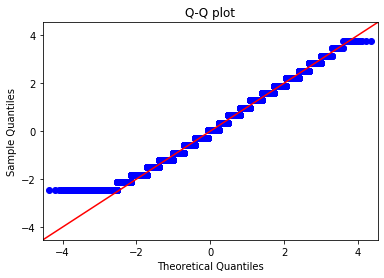

In [11]:
Distribution('points')

   从直方图以及Q-Q图可观察到，属性points的数据模态为单峰，分布近似满足正态分布。

   数值属性price的直方图和Q-Q图结果如下。

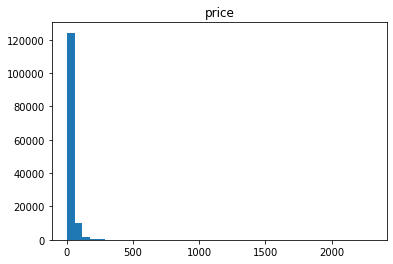

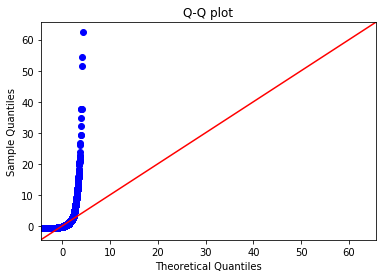

In [12]:
Distribution('price')

   从直方图以及Q-Q图可观察到，属性price的数据分布不满足正态分布。

**盒图——离群点**

   定义函数Boxplot(column_name)，为数值属性进行盒图的绘制，用于观测是否存在离群点。

In [13]:
def Boxplot(column_name):
    column = wine[column_name].dropna()
    column.plot.box(title = column_name)
    plt.grid(linestyle="--",alpha = 0.3)
    plt.show()

   数值属性points的盒图结果如下。

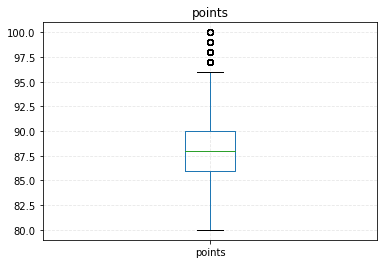

In [14]:
Boxplot('points')

   从盒图可观察到，属性points的数据存在4个离群点。

   数值属性price的盒图结果如下。

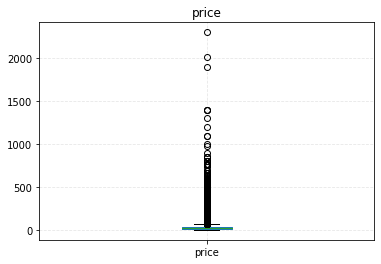

In [15]:
Boxplot('price')

   从盒图可观察到，属性price的数据值多数较小，但也存在着较少的大数值。大数值为离群点。

## 数据缺失的处理

   对于数据缺失的处理，首先统计每一个属性的缺失值数量。

In [16]:
wine.isna().sum()

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

   从结果中，我们可以观察到，其中designation和region信息缺失值较多。

   对于designation信息的缺失，推测可能是由于某些葡萄园信息不明确，产生了缺失现象。

   对于region，从数据集说明中可以得知是葡萄种植地信息，往往因为没有更具体的区域信息，从而导致region_2是空白的，这一点在说明中已经明确，因此此处对region信息缺失的原因不做研究。

   price信息也有13695个缺失值，可能是某种遗漏问题导致的，也有可能是信息的不完备导致的。

   country和province信息缺失较少，因此推测是由于遗漏问题所导致的。

   首先定义函数Show_Nominal(column,column_name)和Show_Numerical(column,column_name)分别用于展示标称属性和数值属性的数据信息。

In [17]:
def Show_Nominal(column,column_name):
    column = column.value_counts()
    column_df = column.to_frame()
    column_df['frequency'] = column.apply(lambda x:x / len(wine.index))
    print(column_df.iloc[:10])
    print('......')
    
    plt.bar(np.arange(10),column.iloc[:10])
    plt.title(column_name)
    plt.show()

In [18]:
def Show_Numerical(column,column_name):
    print(wine[column_name].describe())
    
    column = wine[column_name]
    plt.hist(column,40)
    plt.title(column_name)
    plt.show()
    column = (column - column.mean()) / column.std()
    fig = sm.qqplot(column,line = '45')
    plt.title('Q-Q plot')
    plt.show()

### 删除缺失值

   此处，以标称属性designation为例，分别展示删除前和删除后的结果。

                designation  frequency
Reserve                2752   0.018234
Reserva                1810   0.011992
Estate                 1571   0.010409
Barrel sample          1326   0.008786
Riserva                 754   0.004996
Barrel Sample           639   0.004234
Brut                    624   0.004134
Crianza                 503   0.003333
Estate Grown            449   0.002975
Estate Bottled          396   0.002624
......


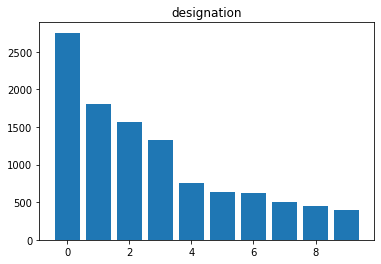

                designation  frequency
Reserve                2752   0.018234
Reserva                1810   0.011992
Estate                 1571   0.010409
Barrel sample          1326   0.008786
Riserva                 754   0.004996
Barrel Sample           639   0.004234
Brut                    624   0.004134
Crianza                 503   0.003333
Estate Grown            449   0.002975
Estate Bottled          396   0.002624
......


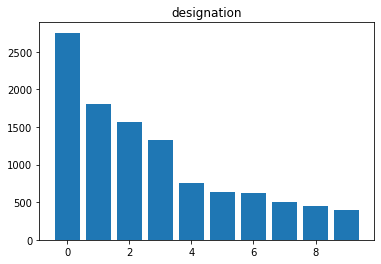

In [19]:
designation = wine['designation']
Show_Nominal(designation,'designation')
delete = designation.dropna()
Show_Nominal(delete,'designation')

   从结果中可以看出，对缺失值的删除对整体数据集未产生影响，因此对于designation属性的数据缺失而言，删除处理是可行的。

In [20]:
designation = wine['designation']
delete = designation.dropna()
print (wine.shape[0],delete.shape[0])

150930 105195


再来对比一下删除前后的数据数量，可明显观察到删除后的数量要小于原数据集中版本2的数据数量，因此认为数据集作者对于版本1缺失数据的处理并非仅仅对其进行删除。

### 用最高频率值来填补缺失值

   此处，以数值属性price为例，分别展示用最高频率值填补前和填补后的结果。

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


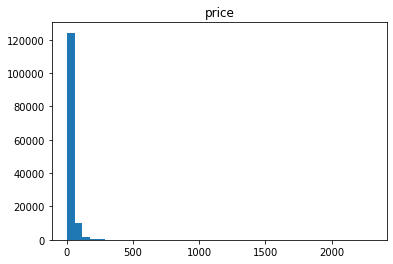

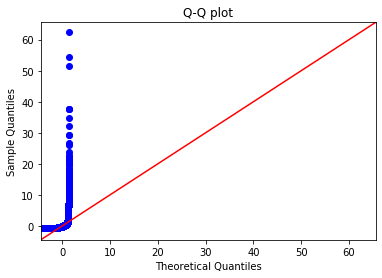

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


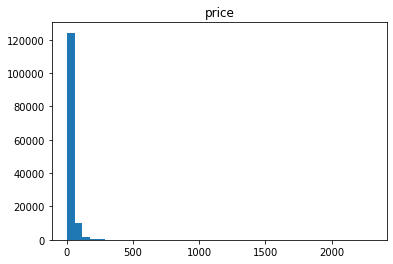

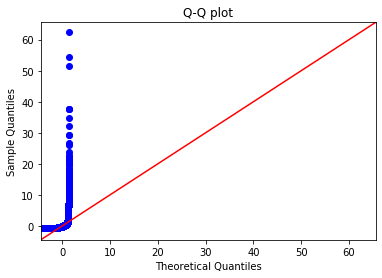

In [21]:
price = wine['price']
Show_Numerical(price,'price')
add = price.fillna(price.mode()[0])
Show_Numerical(add,'price')

   从结果中可以看出，用最高频率值填补缺失值对整体数据集未产生影响，因此对于price属性的数据缺失而言，用最高频率值的填补处理是可行的。

### 通过属性的相关关系来填补缺失值

这里，以标称属性country和province为例。经之前的分析，country和province存在着5个缺失值，进一步分析发现二者是同时存在着缺失的。通过属性分析，发现designation和二者有着属性相关关系，可通过designation数据值推断出country和province的数据值。

In [22]:
wine['country']=wine['country'].fillna('null') 
wine['province']=wine['province'].fillna('null') 
wine[wine['country'].isin(['null'])]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,null,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,null,NaN,NaN,Assyrtiko,Tsililis
1440,null,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,null,NaN,NaN,Red Blend,Büyülübağ
68226,null,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,null,NaN,NaN,Pinot Noir,Chilcas
113016,null,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,null,NaN,NaN,Pinot Noir,Chilcas
135696,null,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,null,NaN,NaN,Pinot Noir,Chilcas


In [23]:
wine.loc[1133,'country']='Greece'
wine.loc[1133,'province']='Greece'
wine.loc[1440,'country']='US'
wine.loc[1440,'province']='Washington'
wine.loc[68226,'country']='Chile'
wine.loc[68226,'province']='Maule Valley'
wine.loc[113016,'country']='Chile'
wine.loc[113016,'province']='Maule Valley'
wine.loc[135696,'country']='Chile'
wine.loc[135696,'province']='Maule Valley'

wine.iloc[1133]

country                                                   Greece
description    Delicate white flowers and a spin of lemon pee...
designation                                            Askitikos
points                                                        90
price                                                         17
province                                                  Greece
region_1                                                     NaN
region_2                                                     NaN
variety                                                Assyrtiko
winery                                                  Tsililis
Name: 1133, dtype: object

In [24]:
wine.iloc[1440]

country                                                       US
description    A blend of 60% Syrah, 30% Cabernet Sauvignon a...
designation                                                 Shah
points                                                        90
price                                                         30
province                                              Washington
region_1                                                     NaN
region_2                                                     NaN
variety                                                Red Blend
winery                                                 Büyülübağ
Name: 1440, dtype: object

In [25]:
wine.iloc[68226]

country                                                    Chile
description    From first sniff to last, the nose never makes...
designation                                         Piedra Feliz
points                                                        81
price                                                         15
province                                            Maule Valley
region_1                                                     NaN
region_2                                                     NaN
variety                                               Pinot Noir
winery                                                   Chilcas
Name: 68226, dtype: object

In [26]:
wine.iloc[113016]

country                                                    Chile
description    From first sniff to last, the nose never makes...
designation                                         Piedra Feliz
points                                                        81
price                                                         15
province                                            Maule Valley
region_1                                                     NaN
region_2                                                     NaN
variety                                               Pinot Noir
winery                                                   Chilcas
Name: 113016, dtype: object

In [27]:
wine.iloc[135696]

country                                                    Chile
description    From first sniff to last, the nose never makes...
designation                                         Piedra Feliz
points                                                        81
price                                                         15
province                                            Maule Valley
region_1                                                     NaN
region_2                                                     NaN
variety                                               Pinot Noir
winery                                                   Chilcas
Name: 135696, dtype: object

从上面的结果可以得知，已经将这五条记录根据属性关系做了填补工作，此时country和province属性的数据值缺失值为0。

In [28]:
print('country:',wine['country'].isnull().sum())
print('province:',wine['province'].isnull().sum())

country: 0
province: 0


接着，进行对比分析，填补后的属性频率是否发生变化。

             country  frequency
US             62398   0.413423
Italy          23478   0.155556
France         21098   0.139787
Spain           8268   0.054780
Chile           5819   0.038554
Argentina       5631   0.037309
Portugal        5322   0.035261
Australia       4957   0.032843
New Zealand     3320   0.021997
Austria         3057   0.020254
......


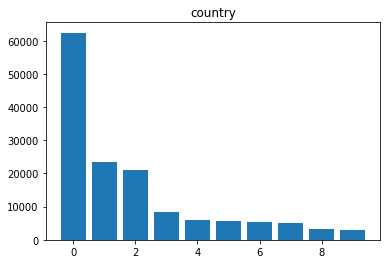

In [29]:
country = wine['country']
Show_Nominal(country,'country')

与上文中处理之前标称属性country的统计结果相比较，未有明显变化。因此，通过属性的相关关系来进行填补操作是可行的。

### 通过数据对象之间的相似性来填补缺失值

此处使用随机森林填补数值属性price的缺失值。根据评分points信息实现对price的预测，从而进行缺失值的填补。

In [30]:
forest=pd.DataFrame(pd.read_csv('winemag-data_first150k.csv'))
known_price = forest[forest['price'].notnull()]
unknown_price = forest[forest['price'].isnull()]
x = known_price[['points']]
y = known_price[['price']]
t_x = unknown_price[['points']]
fc=RandomForestClassifier()
fc.fit(x,y)
pr=fc.predict(t_x)
forest.loc[forest.price.isnull(),'price'] = pr

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64


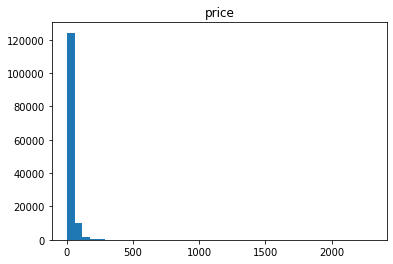

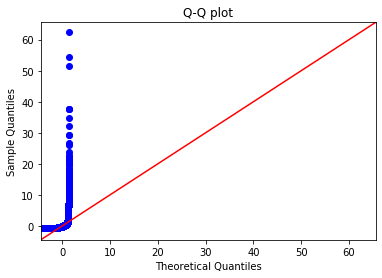

In [31]:
price = wine['price']
Show_Numerical(price,'price')

对数值属性price进行结果统计，与上文结果进行对比，未发现明显区别，因此认为通过相似性来进行填补是可行的。

# Chicago Building Violations 数据集

## 数据准备

数据集主页：https://www.kaggle.com/chicago/chicago-building-violations

此数据集中包含1个csv文件,对数据进行导入。

In [32]:
building = pd.read_csv("building-violations.csv")
print(building.shape[0])

1677788


通过数据的输出，可表明csv文件数据导入成功，共包含1677788个数据项。

## 数据可视化和摘要

### 数据摘要

首先，先对数据进行信息统计。

In [33]:
print('%d colunms' % len(building.columns))
print('%d rows' % len(building.index))
print()
print(building.dtypes.value_counts())

32 colunms
1677788 rows

object     19
float64     9
int64       4
dtype: int64


   数据的前5行如下所示。

In [34]:
building.head(5)

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0


   因此，可以分析出该数据集中包含13个数值属性，经分析后将LATITUDE和LONGITUDE作为分析对象，其他数值型属性均为编号类型，不具有分析意义。其余19个为标称属性。由于标称属性的数量较多，此处分析以STREET DIRECTION和STREET TYPE为例。

**标称属性摘要**

   定义统计函数Count_Nominal(column_name,number)，统计标称属性中不同值的出现次数和频率，展示出现频率最高的前10个值。

In [35]:
def Count_Nominal(column_name,number):
    column = building[column_name].value_counts()
    print('Column name:',column_name)
    print("%d different values" % len(column))
    print()
    column_df = column.to_frame()
    column_df['frequency'] = column.apply(lambda x:x / len(building.index))
    print(column_df.iloc[:number])
    print('......')
    
    plt.bar(np.arange(number),column.iloc[:number])
    plt.title(column_name)
    plt.show()

统计标称属性STREET DIRECTION如下。

Column name: STREET DIRECTION
4 different values

   STREET DIRECTION  frequency
S            683917   0.407630
W            500418   0.298261
N            395246   0.235576
E             98207   0.058534
......


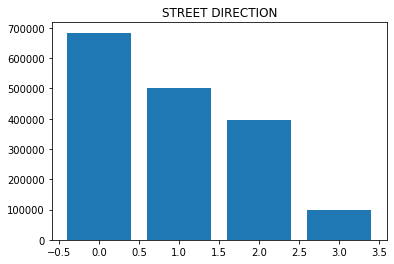

In [36]:
Count_Nominal('STREET DIRECTION',4)

统计标称属性STREET TYPE如下。

Column name: STREET TYPE
14 different values

      STREET TYPE  frequency
AVE        940725   0.560694
ST         523743   0.312163
BLVD        59536   0.035485
PL          57665   0.034370
RD          41100   0.024497
DR          27145   0.016179
PKWY         6605   0.003937
CT           3287   0.001959
TER          2222   0.001324
HWY          1559   0.000929
......


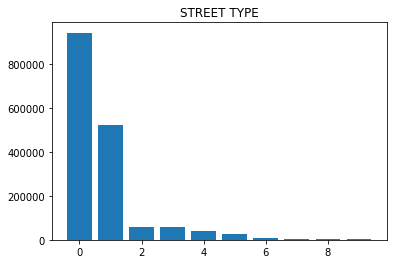

In [37]:
Count_Nominal('STREET TYPE',10)

**数值属性摘要**

首先，对数值属性的缺失值个数进行统计。

In [38]:
print('LATITUDE:',building['LATITUDE'].isnull().sum())
print('LONGITUDE:',building['LONGITUDE'].isnull().sum())

LATITUDE: 1510
LONGITUDE: 1510


从结果中，可得出，数值属性LATITUDE和LONGITUDE缺失值个数均为1510。

其次，对LATITUDE和LONGITUDE两个属性进行统计，统计其有效值数量、平均值、标准差、最小值、第一个四分位数、中位数、第二个四分位数以及最大值。结果如下所示。

In [39]:
print(building['LATITUDE'].describe())
print()
print(building['LONGITUDE'].describe())

count    1.676278e+06
mean     4.184566e+01
std      8.742421e-02
min      4.164467e+01
25%      4.177090e+01
50%      4.185400e+01
75%      4.191350e+01
max      4.202269e+01
Name: LATITUDE, dtype: float64

count    1.676278e+06
mean    -8.767266e+01
std      5.760184e-02
min     -8.791444e+01
25%     -8.771392e+01
50%     -8.766985e+01
75%     -8.763288e+01
max     -8.752468e+01
Name: LONGITUDE, dtype: float64


### 数据可视化

**直方图与Q-Q图——数据分布**

定义函数Distribution(column_name)，对数值属性值的出现次数进行直方图的绘制，并将其进行标准化为均值为0，方差为1的分布，将标准正态分布作为参考一起绘制Q-Q图，用于观测数据的分布情况。

In [40]:
def Distribution(column_name):
    column = building[column_name].dropna()
    plt.hist(column,40)
    plt.title(column_name)
    plt.show()
    
    column = (column - column.mean()) / column.std()
    fig = sm.qqplot(column,line = '45')
    plt.title('Q-Q plot')
    plt.show()

   数值属性LATITUDE的直方图和Q-Q图结果如下。

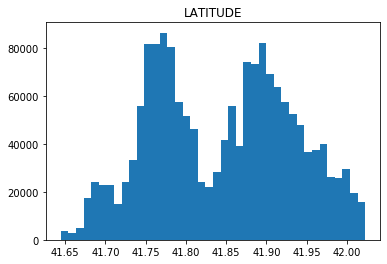

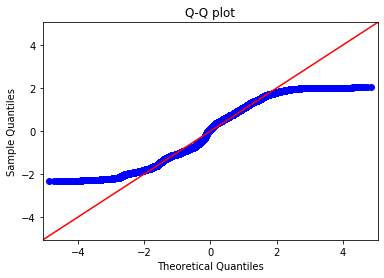

In [41]:
Distribution('LATITUDE')

从直方图以及Q-Q图可观察到，属性LATITUDE的数据模态为双峰，分布近似满足正态分布。

数值属性LONGITUDE的直方图和Q-Q图结果如下。

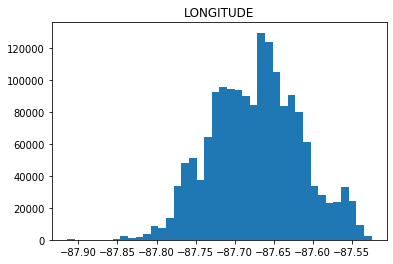

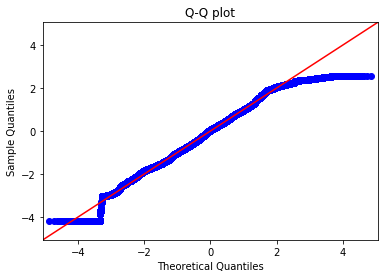

In [42]:
Distribution('LONGITUDE')

从直方图以及Q-Q图可观察到，属性LONGITUDE的数据模态为单峰，分布近似满足正态分布。

**盒图——离群点**

定义函数Boxplot(column_name)，为数值属性进行盒图的绘制，用于观测是否存在离群点。

In [43]:
def Boxplot(column_name):
    column = building[column_name].dropna()
    column.plot.box(title = column_name)
    plt.grid(linestyle="--",alpha = 0.3)
    plt.show()

数值属性LATITUDE的盒图结果如下。

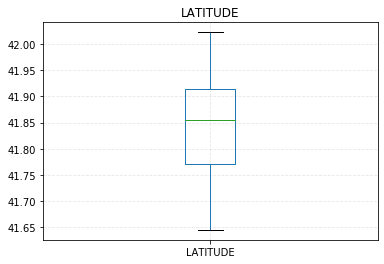

In [44]:
Boxplot('LATITUDE')

从盒图可观察到，属性LATITUDE的数据不存在离群点。

数值属性LONGITUDE的盒图结果如下。

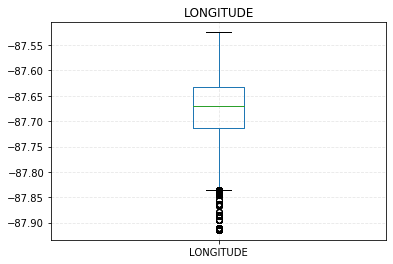

In [45]:
Boxplot('LONGITUDE')

从盒图可观察到，属性LONGITUDE的数据值存在着较多的小数值离群点

## 数据缺失的处理 

对于数据缺失的处理，首先统计每一个属性的缺失值数量。

In [46]:
building.isna().sum()

ID                                    0
VIOLATION LAST MODIFIED DATE          0
VIOLATION DATE                        0
VIOLATION CODE                        0
VIOLATION STATUS                      0
VIOLATION STATUS DATE           1036199
VIOLATION DESCRIPTION             10768
VIOLATION LOCATION               897282
VIOLATION INSPECTOR COMMENTS     175463
VIOLATION ORDINANCE               47581
INSPECTOR ID                          0
INSPECTION NUMBER                     0
INSPECTION STATUS                    16
INSPECTION WAIVED                     0
INSPECTION CATEGORY                   0
DEPARTMENT BUREAU                     0
ADDRESS                               0
STREET NUMBER                         0
STREET DIRECTION                      0
STREET NAME                           0
STREET TYPE                       13541
PROPERTY GROUP                        0
SSA                             1356267
LATITUDE                           1510
LONGITUDE                          1510


从结果中，我们可以观察到，从LATITUDE开始一直到Historical Wards 2003-2015，这些数据的缺失数量较为接近，进一步观察后发现大部分是一起缺失的，因此可能是信息的不完备导致的。在此，以几个比较有意义的属性作为分析对象。

首先定义函数Show_Nominal(pd,column,column_name,number)和Show_Numerical(pd,column,column_name)分别用于展示标称属性和数值属性的数据信息。

In [47]:
def Show_Nominal(pd,column,column_name,number):
    column = column.value_counts()
    column_df = column.to_frame()
    column_df['frequency'] = column.apply(lambda x:x / len(pd.index))
    print(column_df.iloc[:number])
    print('......')
    
    plt.bar(np.arange(number),column.iloc[:number])
    plt.title(column_name)
    plt.show()

In [48]:
def Show_Numerical(pd,column,column_name):
    print(pd[column_name].describe())
    
    column = pd[column_name]
    plt.hist(column,40)
    plt.title(column_name)
    plt.show()
    column = (column - column.mean()) / column.std()
    fig = sm.qqplot(column,line = '45')
    plt.title('Q-Q plot')
    plt.show()

### 删除缺失值

此处，标称属性INSPECTION STATUS仅缺失了16个数据值，因此以其为例，分别展示删除前和删除后的结果。

        INSPECTION STATUS  frequency
FAILED            1159758   0.691242
PASSED             293076   0.174680
CLOSED             224784   0.133976
HOLD                  154   0.000092
......


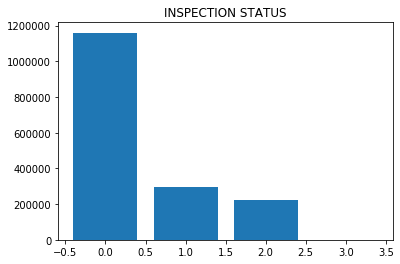

        INSPECTION STATUS  frequency
FAILED            1159758   0.691242
PASSED             293076   0.174680
CLOSED             224784   0.133976
HOLD                  154   0.000092
......


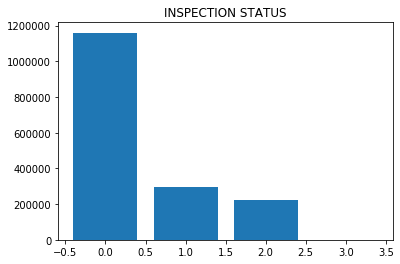

In [49]:
INSPE_STATUS = building['INSPECTION STATUS']
Show_Nominal(building,INSPE_STATUS,'INSPECTION STATUS',4)
delete = INSPE_STATUS.dropna()
Show_Nominal(building,delete,'INSPECTION STATUS',4)

从结果中可以看出，对缺失值的删除对整体数据集未产生影响，因此对于INSPECTION STATUS属性的数据缺失而言，删除处理是可行的。

### 用最高频率值来填补缺失值

此处，以数值属性LATITUDE为例，分别展示用最高频率值填补前和填补后的结果。

count    1.676278e+06
mean     4.184566e+01
std      8.742421e-02
min      4.164467e+01
25%      4.177090e+01
50%      4.185400e+01
75%      4.191350e+01
max      4.202269e+01
Name: LATITUDE, dtype: float64


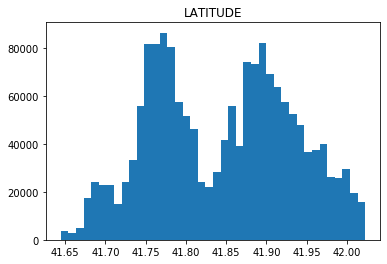

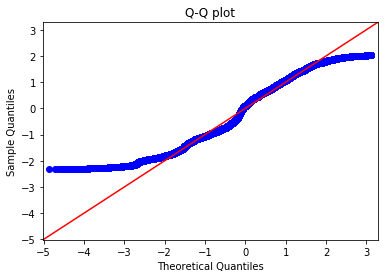

count    1.676278e+06
mean     4.184566e+01
std      8.742421e-02
min      4.164467e+01
25%      4.177090e+01
50%      4.185400e+01
75%      4.191350e+01
max      4.202269e+01
Name: LATITUDE, dtype: float64


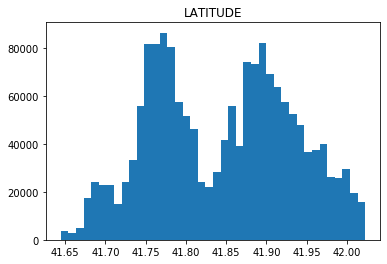

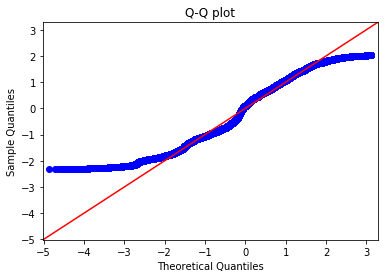

In [50]:
LATITUDE = building['LATITUDE']
Show_Numerical(building,LATITUDE,'LATITUDE')
add = LATITUDE.fillna(LATITUDE.mode()[0])
Show_Numerical(building,add,'LATITUDE')

从结果中可以看出，用最高频率值填补缺失值对整体数据集未产生影响，因此对于LATITUDE属性的数据缺失而言，用最高频率值的填补处理是可行的。

### 通过属性的相关关系来填补缺失值

这里，以标称属性STREET TYPE为例。经之前的分析，STREET TYPE存在着13541个缺失值，通过属性分析，发现与STREET NAME有着属性相关关系，可通过STREET NAME数据值推断出STREET TYPE的数据值。因此，在进行人工处理后，得到了新的csv文件，验证缺失值个数为0。

In [51]:
building_add = pd.read_csv("building-violations_add.csv")
building_add['STREET TYPE'].isna().sum()

0

接着，进行对比分析，填补后的属性频率是否发生变化。

      STREET TYPE  frequency
AVE        940725   0.560694
ST         523743   0.312163
BLVD        59536   0.035485
PL          57665   0.034370
RD          41100   0.024497
DR          27145   0.016179
PKWY         6605   0.003937
CT           3287   0.001959
TER          2222   0.001324
HWY          1559   0.000929
......


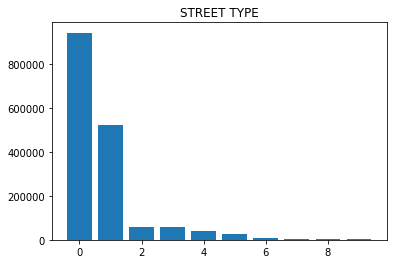

      STREET TYPE  frequency
AVE        589897   0.562570
ST         329906   0.314623
PL          38675   0.036883
BLVD        35972   0.034306
RD          25704   0.024513
DR          17894   0.017065
PKWY         4650   0.004435
CT           2261   0.002156
TER          1167   0.001113
HWY           801   0.000764
......


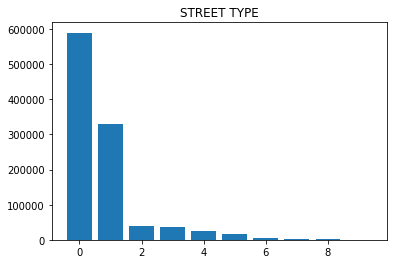

In [52]:
INSPE_STATUS = building['STREET TYPE']
Show_Nominal(building,INSPE_STATUS,'STREET TYPE',10)
INSPE_STATUS_ADD = building_add['STREET TYPE']
Show_Nominal(building_add,INSPE_STATUS_ADD,'STREET TYPE',10)

添加前后标称属性STREET TYPE的统计结果相比较，未有明显变化。因此，通过属性的相关关系来进行填补操作是可行的。

### 通过数据对象之间的相似性来填补缺失值

此处使用随机森林填补数值属性LATITUDE的缺失值。根据INSPECTION NUMBER信息实现对LATITUDE的预测，从而进行缺失值的填补。由于数据集过大而无法进行操作，因此取前150000个数据作为此次处理对象。

In [53]:
building_small = building.head(150000)
print (building_small.shape[0])

150000


In [54]:
building_small['LATITUDE'].isna().sum()

113

展示这150000个数据中数值属性LATITUDE的分布情况。

count    149887.000000
mean         41.836063
std           0.086293
min          41.644702
25%          41.763480
50%          41.838064
75%          41.902579
max          42.022639
Name: LATITUDE, dtype: float64


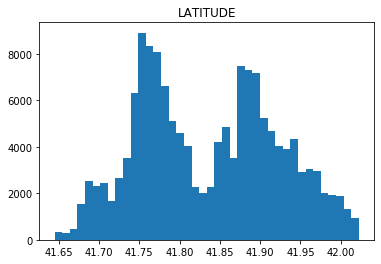

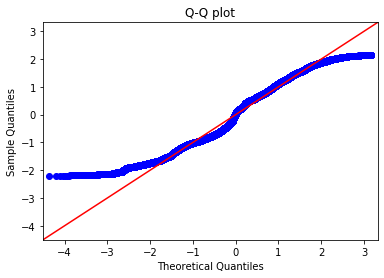

In [55]:
Show_Numerical(building_small,building_small['LATITUDE'],'LATITUDE')

对这其中113个空值使用随机森林进行填补，并展示填补后的数据分布情况。

count    150000.000000
mean         41.835433
std           0.089258
min          41.000000
25%          41.763354
50%          41.837979
75%          41.902524
max          42.022639
Name: LATITUDE, dtype: float64


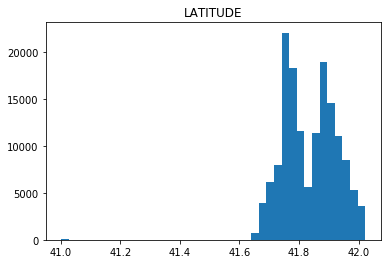

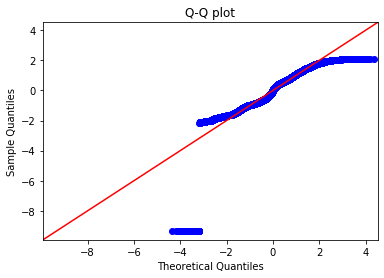

In [56]:
forest=pd.DataFrame(building_small)
known = forest[forest['LATITUDE'].notnull()]
unknown = forest[forest['LATITUDE'].isnull()]
x = known[['INSPECTION NUMBER']]
y = known[['LATITUDE']]
t_x = unknown[['INSPECTION NUMBER']]
fc=RandomForestClassifier()
fc.fit(x,y.astype('int'))
pr=fc.predict(t_x)
forest.loc[forest.LATITUDE.isnull(),'LATITUDE'] = pr
    
Show_Numerical(building_small,building_small['LATITUDE'],'LATITUDE')

与之前的结果相比较，变动较大。因此对于此数据集中的LATITUDE属性而言，使用随机森林进行填补缺失值是不合适的，因为数据集中不存在可作为预测根据的属性。